2. Ensemble methods and Decision Trees

Exercise 3: Ensemble of Batman Trees

In [1]:
###    Import all the imports that we need
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv = np.genfromtxt("bm.csv",delimiter=",",skip_header=0)
np.random.shuffle(csv)
train = csv[:9000]
test = csv[9000:]
print(f"The length of the training set is {len(train)}.")
print(f"The length of the testing set is {len(test)}.")
print("The basic of training set is like following:")
print(train)
print("The basic of testing set is like following:")
print(test)

The length of the training set is 9000.
The length of the testing set is 1000.
The basic of training set is like following:
[[-4.849   -1.2853   1.     ]
 [ 1.4663  -0.13074  1.     ]
 [-5.2833  -0.57576  1.     ]
 ...
 [ 7.8488   0.4505   0.     ]
 [-7.0599   1.5016   0.     ]
 [ 0.61787  0.76763  1.     ]]
The basic of testing set is like following:
[[-2.6513   0.39667  1.     ]
 [-6.0222   1.6137   0.     ]
 [-7.2466  -2.4755   0.     ]
 ...
 [-3.8472  -0.91058  1.     ]
 [ 6.9184  -3.4661   0.     ]
 [-5.257   -3.7198   0.     ]]


In [3]:
rng = np.random.default_rng()

n = 5000
r = np.zeros([n,100],dtype=int)
T = np.zeros([n,3,100])

for i in range(100):
    r[:,i] = rng.choice(n,size=n,replace=True)
    T[:,:,i]=train[r[:,i],:]

Part (a): The estimate of the generalization error using the test set of the ensemble of 100 decision trees.

In [4]:
from sklearn import tree

In [5]:
classification = np.array(np.full((1000,100),0,dtype=int))
for i in range(100):
    X = T[:,:,i][:,:2]
    Y = T[:,:,i][:,2]
    model = tree.DecisionTreeClassifier()
    model.fit(X,Y)
    Y_predict = model.predict(test[:,:2])
    classification[:,i] = np.array(Y_predict)
Y_ensemble = []
for i in range(1000):
    b = np.sum(classification[i,:],axis=0)
    if b>=50:
        Y_ensemble.append(1)
    else:
        Y_ensemble.append(0)
Y_ensemble = np.array(Y_ensemble)
ensemble_error = 0
for i in range(1000):
    if Y_ensemble[i] != np.array(test[:,2])[i]:
        ensemble_error = ensemble_error+1
ensemble_error_rate = ensemble_error / 1000
print(f"The estimate of the generalization error using the test set of the ensemble of 100 decision trees is: {ensemble_error_rate}")
    

The estimate of the generalization error using the test set of the ensemble of 100 decision trees is: 0.026


Part (b): The average estimated generalization error of the individual decision trees.

In [6]:
error = []
for i in range(100):
    X = T[:,:,i][:,:2]
    Y = T[:,:,i][:,2]
    model = tree.DecisionTreeClassifier()
    model.fit(X,Y)
    Y_predict = model.predict(test[:,:2])
    num = 0
    for i in range(len(Y_predict)):
        if Y_predict[i] != np.array(test[:,2])[i]:
            num+=1
    error_rate = num/1000
    error.append(error_rate)
average_error = (np.sum(error))/100
print(f"The average estimated generalization error of the individual decision trees is: {np.round(average_error,3)}")

The average estimated generalization error of the individual decision trees is: 0.037


Part(c): A plot of the decision boundaries of all the models, and including the ensemble model. (c.f Figure 2)

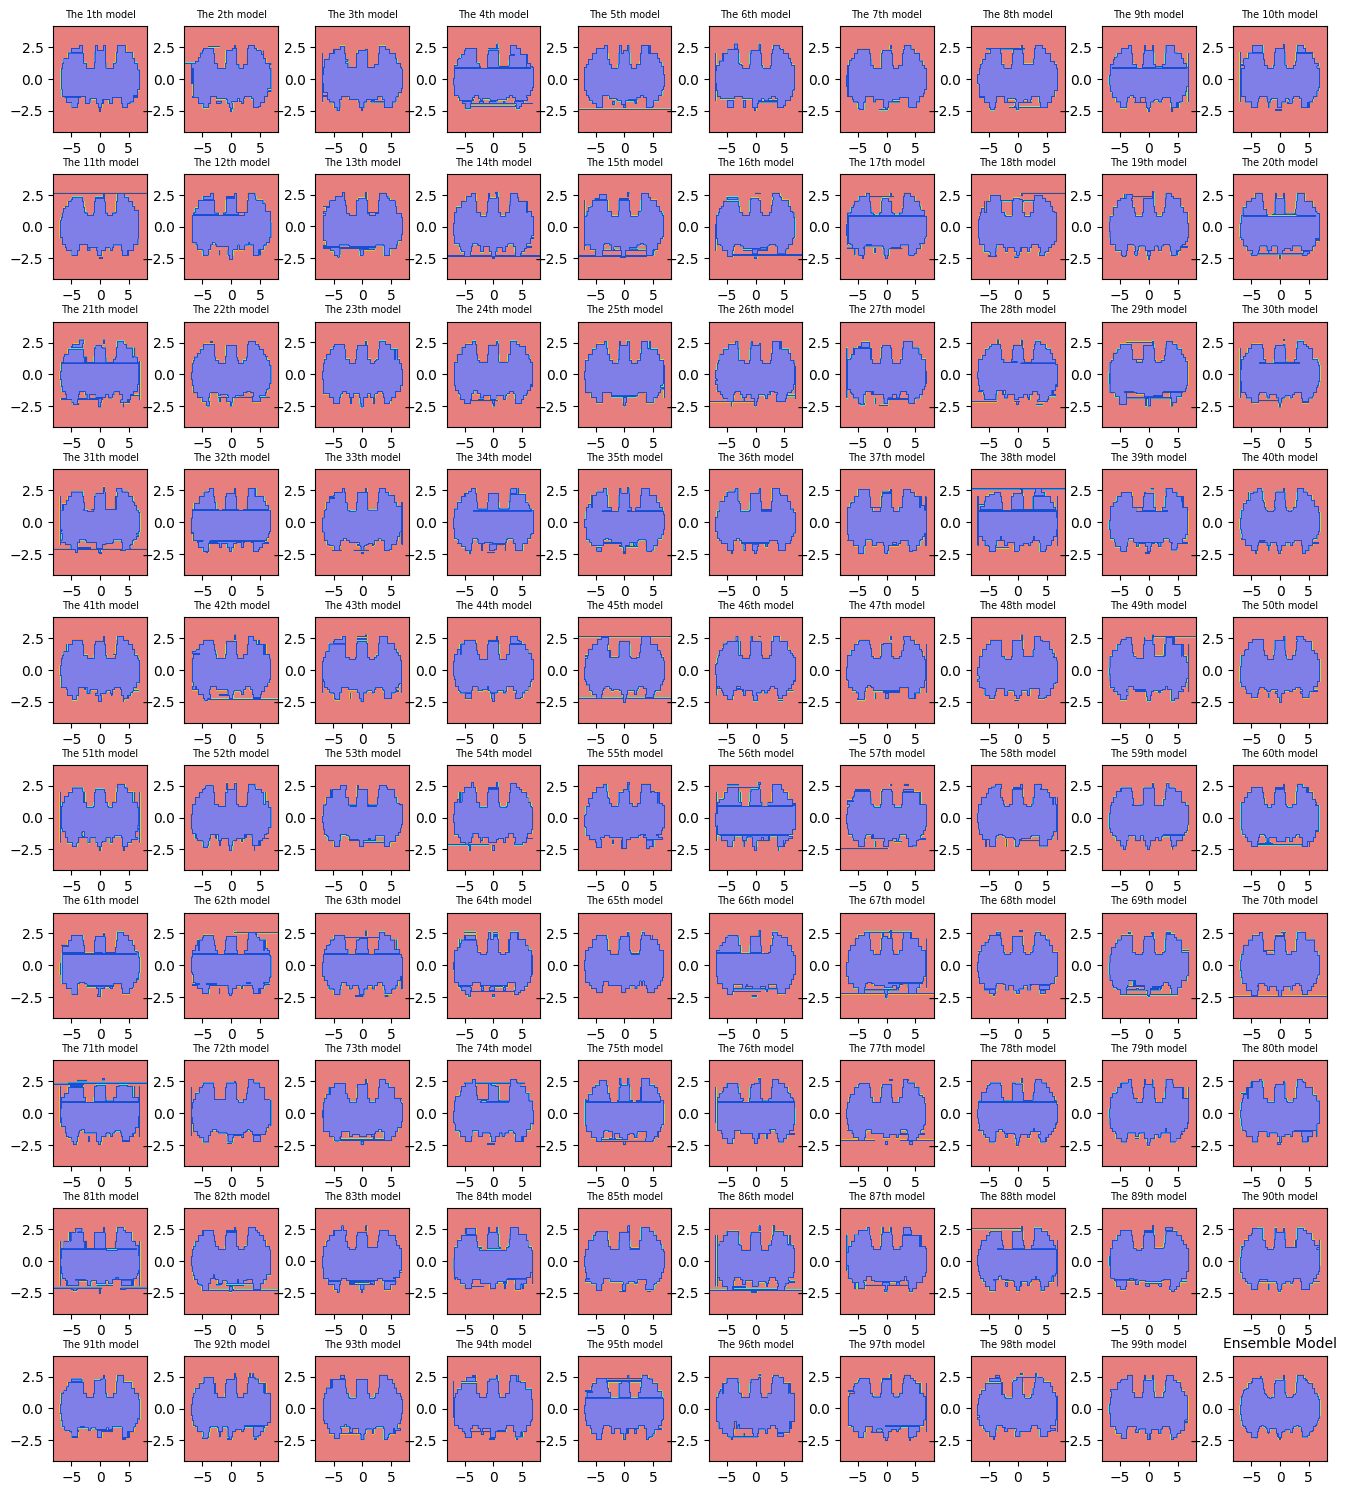

In [7]:
plt.figure()
for i in range(99):
    plt.subplot(10,10,i+1)
    plt.subplots_adjust(left=0.01, right=2, bottom=0.01, top=3, wspace=0.4, hspace=0.4)
    X = T[:,:,i][:,:2]
    Y = T[:,:,i][:,2]
    model = tree.DecisionTreeClassifier()
    model.fit(X,Y)
    X1 = X[:,0]
    X2 = X[:,1]
    x1_min = X1.min()-0.15
    x1_max = X1.max()+0.15
    x2_min = X2.min()-0.15
    x2_max = X2.max()+0.15
    x1s = np.linspace(x1_min,x1_max,200)
    x2s = np.linspace(x2_min,x2_max,200)
    x1,x2 = np.meshgrid(x1s,x2s)
    X_point = np.c_[x1.ravel(),x2.ravel()]
    y_pred = model.predict(X_point).reshape(x1.shape)
    plt.title(f"The {i+1}th model",fontsize=7)
    plt.contourf(x1,x2,y_pred, cmap='jet_r',alpha=0.5)
plt.subplot(10,10,100)
plt.subplots_adjust(left=0.01, right=2, bottom=0.01, top=3, wspace=0.4, hspace=0.4)
classification = np.array(np.full((40000,100),0,dtype=int))
X1 = train[:,0]
X2 = train[:,1]
x1_min = X1.min()-0.15
x1_max = X1.max()+0.15
x2_min = X2.min()-0.15
x2_max = X2.max()+0.15
x1s = np.linspace(x1_min,x1_max,200)
x2s = np.linspace(x2_min,x2_max,200)
x1,x2 = np.meshgrid(x1s,x2s)
X_point = np.c_[x1.ravel(),x2.ravel()]
for i in range(100):
    X = T[:,:,i][:,:2]
    Y = T[:,:,i][:,2]
    model = tree.DecisionTreeClassifier()
    model.fit(X,Y)
    Y_predict = model.predict(X_point)
    classification[:,i] = np.array(Y_predict)
Y_ensemble = []
for i in range(40000):
    b = np.sum(classification[i,:],axis=0)
    if b>=50:
        Y_ensemble.append(1)
    else:
        Y_ensemble.append(0)
Y_ensemble = np.array(Y_ensemble)
Y_ensemble = Y_ensemble.reshape(x1.shape)
plt.title("Ensemble Model",fontsize=10)
plt.contourf(x1,x2,Y_ensemble, cmap='jet_r',alpha=0.5)
plt.show()
    

Part(d): Finally, a short comment on the results. Was it expected? Surprising? Do you see any benefits,
downsides with this method?

Firstly, we talk compare the generalization error by either useing ensemble methods or using average error as output.

From statistics of part (a) and (b), it is easy to see that using ensemble methods of decision tree will have a lower generalization error compared to taking average in every individual decision tree no matter how dataset is randomly shuffled. So here ensemble methods are improving the decision tree model.

Secondly, we talk about the decision boundaries in part (c).

It is obvious that the last (down-right corner) batman figure is much more rounded and mellow compared to the individual plot that shows many overfitting angles and horizonal, vertical lines, where extremely long horizonal line and dark color patterns also showing on those individual batman plots.

In a nutshell, ensemble methods work better both in terms of test error and figure plot.